In [2]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split

#Machine Learning Training
from sklearn.ensemble import ExtraTreesRegressor

#Machine Learning Evaluation
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


In [3]:
df=pd.read_csv("/content/garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


**DataFrame observation**

In [4]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [6]:
# Dependent - actual_productivity

continuous_columns = ['team', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
                      'no_of_workers', 'actual_productivity']
category_columns = ['date', 'quarter', 'department', 'day', 'targeted_productivity', 'no_of_style_change']

#Supervised Regression

**Data cleaning using pandas**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
df.wip.fillna(0, inplace = True)

In [10]:
df.wip.isnull().sum()

0

In [11]:
df.duplicated().sum()

0

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
encode = OrdinalEncoder()
df.quarter = encode.fit_transform(df[["quarter"]])
df.department = encode.fit_transform(df[["department"]])
df.day = encode.fit_transform(df[['day']])
df.date = encode.fit_transform(df[['date']])


In [14]:
df.quarter.unique()

array([0., 1., 2., 3., 4.])

**Hypothesis testing / Statistical analysis**

In [15]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)

In [16]:
res=[]
for i in continuous_columns:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)

,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,team,6.426901,6.324000,H0-There is no significant difference,0.284690,0.777132
1,smv,15.062172,15.169340,H0-There is no significant difference,-0.636463,0.527562
2,wip,687.228070,697.222000,H0-There is no significant difference,-1.068874,0.290586
3,over_time,4567.460317,4578.660000,H0-There is no significant difference,1.999991,0.051299
4,incentive,38.210526,30.304000,Ha-There is significant difference,0.022832,0.981881
5,idle_time,0.730159,0.607000,Ha-There is significant difference,-3.380952,0.001462
6,idle_men,0.369256,0.260000,Ha-There is significant difference,0.820214,0.416234
7,no_of_workers,34.609858,34.442000,H0-There is no significant difference,-1.280376,0.206696
8,actual_productivity,0.735091,0.729388,H0-There is no significant difference,-0.331471,0.741762


In [17]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [18]:
columns=continuous_columns
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)

,column,twosamplettest,t_test_value,P_value,twosamplettest central,t_test_valuone,P_valueone
0,team&smv,Ha-There is significant difference,-11.078009,1.564623e-25,Ha-There is significant difference,-19.508159,1.479845e-13
1,team&wip,Ha-There is significant difference,-14.644175,2.352445e-40,Ha-There is significant difference,-9.267081,2.843525e-08
2,team&over_time,Ha-There is significant difference,-21.324737,2.548607e-71,Ha-There is significant difference,-40.718914,3.542426e-19
3,team&incentive,Ha-There is significant difference,-9.893695,4.099693e-21,Ha-There is significant difference,-2.490560,2.274981e-02
4,team&idle_time,Ha-There is significant difference,27.384019,7.736098e-100,Ha-There is significant difference,40.932550,3.227075e-19
5,team&idle_men,Ha-There is significant difference,25.517178,3.822747e-91,Ha-There is significant difference,26.961705,5.265565e-16
6,team&no_of_workers,Ha-There is significant difference,-18.718910,5.339017e-59,Ha-There is significant difference,-26.936289,5.353630e-16
7,team&actual_productivity,Ha-There is significant difference,27.130037,1.159162e-98,Ha-There is significant difference,51.003788,6.357387e-21
8,smv&wip,Ha-There is significant difference,-15.160288,1.213070e-42,Ha-There is significant difference,-13.135734,1.161465e-10
9,smv&over_time,Ha-There is significant difference,-21.420129,8.984454e-72,Ha-There is significant difference,-53.082082,3.111852e-21


In [19]:
def chi_square_test(category_column1,category_column2):
  result={}
  H0_accepted=0
  H0_rejected=0
  data1=pd.crosstab(df[category_column1],df[category_column2])
  observed_values=data1.values
  value=stats.chi2_contingency(observed_values)
  p_value=value[1]
  if p_value<0.05:
     H0_rejected+=1
  else:
    H0_accepted+=1
  if H0_accepted>H0_rejected:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is no relationship between two mentioned column" })
  else:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is relationship between two mentioned column" })

  return result

In [20]:
Category=category_columns
res2=[]
for i in range(len(Category)-1):
  category1=Category[i]
  for j in range(i+1,len(Category)):
      category2=Category[j]
      chi=chi_square_test(category1,category2)
      res2.append(chi)
pd.set_option('max_colwidth', None)
pd.DataFrame(res2)


,column,chi_square_test
0,date&quarter,There is relationship between two mentioned column
1,date&department,There is relationship between two mentioned column
2,date&day,There is relationship between two mentioned column
3,date&targeted_productivity,There is relationship between two mentioned column
4,date&no_of_style_change,There is relationship between two mentioned column
5,quarter&department,There is relationship between two mentioned column
6,quarter&day,There is relationship between two mentioned column
7,quarter&targeted_productivity,There is relationship between two mentioned column
8,quarter&no_of_style_change,There is relationship between two mentioned column
9,department&day,There is no relationship between two mentioned column


In [21]:
def annova_test(continous_column,category_column):
   result={}
   H0_accepted=0
   H0_rejected=0
   group=df[category_column].unique()
   grp={}
   for i in group:
     grp[i]=df[continous_column][df[category_column]==i]
   f_value,p_value=stats.f_oneway(*grp.values())
   if p_value<0.05:
    H0_rejected+=1
   else:
     H0_accepted+=1
   if H0_accepted>H0_rejected:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is relationship between mentioned column"})
   else:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is no relationship between mentioned column"})

   return result

In [22]:
Category=category_columns
continous=continuous_columns
res3=[]
for i in continous:
  for j in Category:
    ann=annova_test(i,j)
    res3.append(ann)
pd.DataFrame(res3)

,column,Annova_test
0,team&date,There is relationship between mentioned column
1,team&quarter,There is relationship between mentioned column
2,team&department,There is relationship between mentioned column
3,team&day,There is relationship between mentioned column
4,team&targeted_productivity,There is relationship between mentioned column
5,team&no_of_style_change,There is no relationship between mentioned column
6,smv&date,There is relationship between mentioned column
7,smv&quarter,There is relationship between mentioned column
8,smv&department,There is no relationship between mentioned column
9,smv&day,There is relationship between mentioned column


In [23]:
df[continuous_columns].corr()

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity
team,1.000000,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.075113,-0.148753
smv,-0.110011,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.912176,-0.122089
wip,-0.011057,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.373908,0.047389
over_time,-0.096737,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.734164,-0.054206
incentive,-0.007674,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,0.049222,0.076538
idle_time,0.003796,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,0.058049,-0.080851
idle_men,0.026974,0.105901,-0.007119,-0.017913,-0.021140,0.559146,1.000000,0.106946,-0.181734
no_of_workers,-0.075113,0.912176,0.373908,0.734164,0.049222,0.058049,0.106946,1.000000,-0.057991
actual_productivity,-0.148753,-0.122089,0.047389,-0.054206,0.076538,-0.080851,-0.181734,-0.057991,1.000000


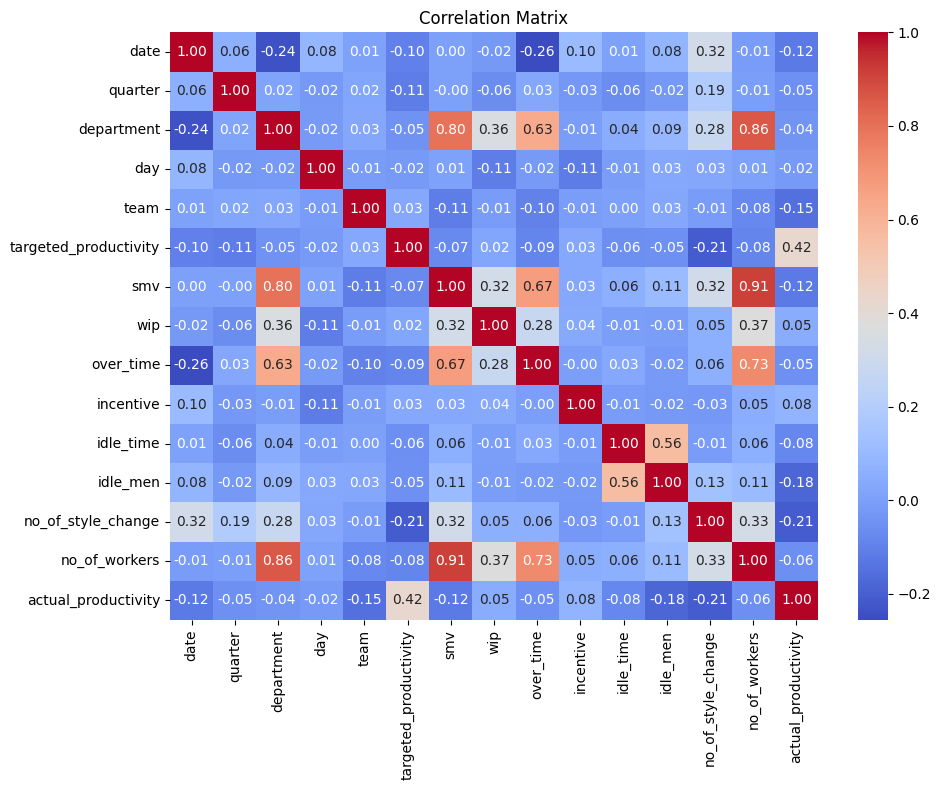

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Data Visualization**

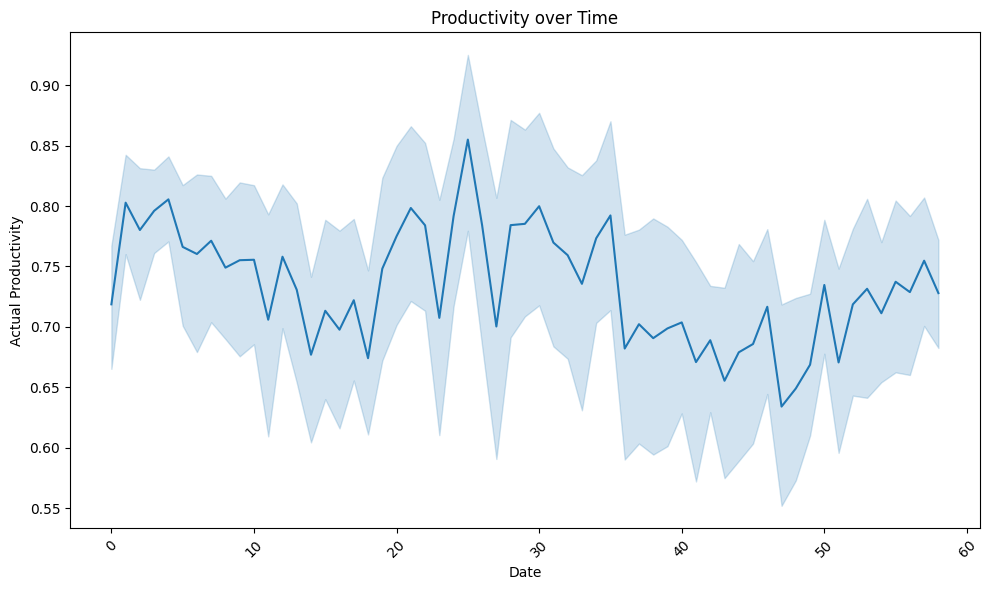

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='actual_productivity', data=df)
plt.title('Productivity over Time')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

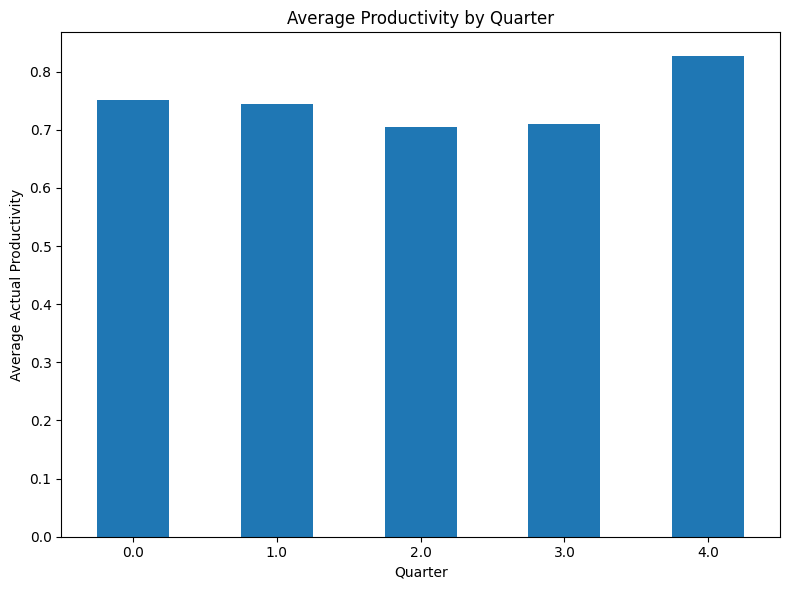

In [29]:
# Bar plot of Productivity by Quarter
plt.figure(figsize=(8, 6))
df.groupby('quarter')['actual_productivity'].mean().plot(kind='bar')
plt.title('Average Productivity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Actual Productivity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

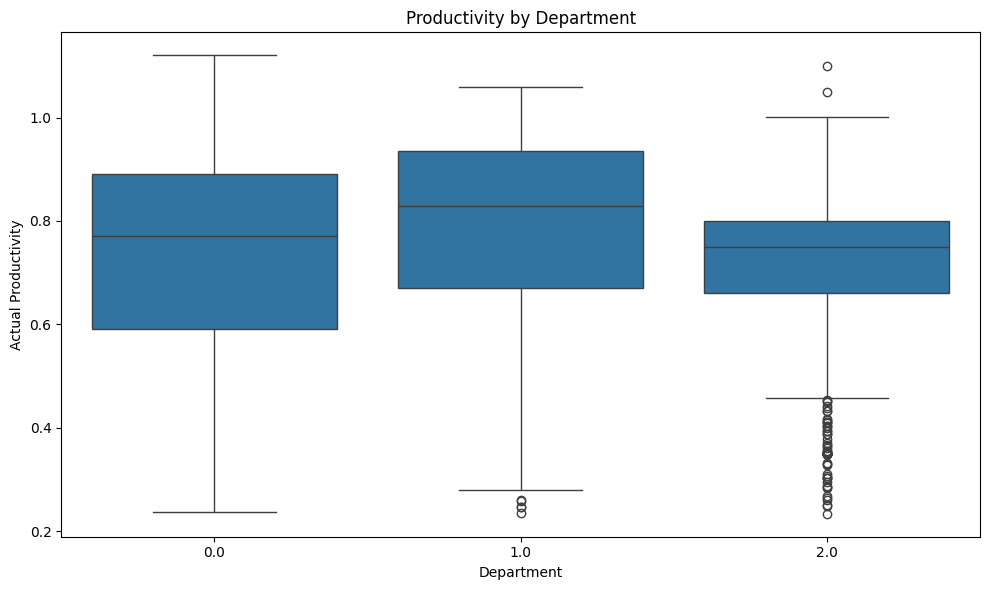

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='actual_productivity', data=df)
plt.title('Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.tight_layout()
plt.show()

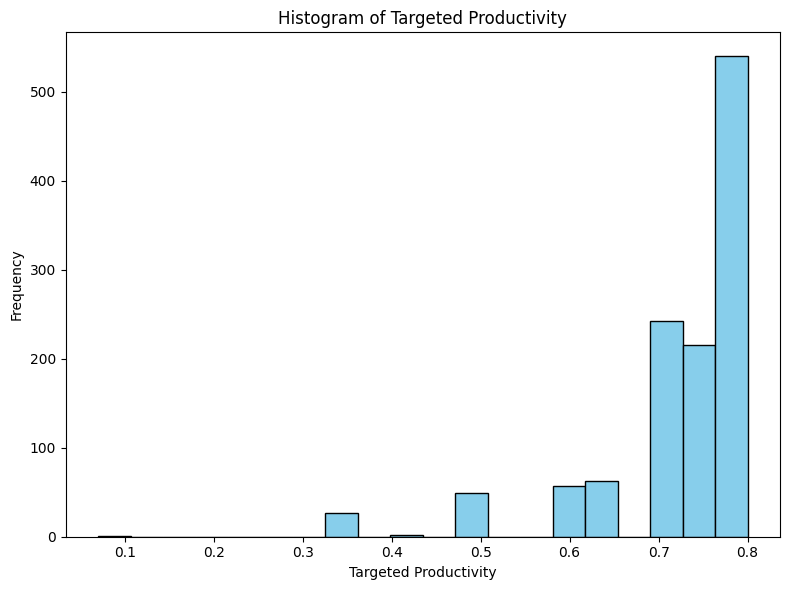

In [31]:
plt.figure(figsize=(8, 6))
plt.hist(df['targeted_productivity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Machine Learning**

In [32]:
x = df.drop("actual_productivity", axis = 1 )
y = df.actual_productivity

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.9)

In [34]:
model = ExtraTreesRegressor(max_depth = 25).fit(x_train,y_train)
y_pred=model.predict(x_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.011625027207483896, 0.6349282031609819)